In [4]:
!pip install scikeras

In [5]:
from sklearn.model_selection import GridSearchCV  #for hyperparameter tuning GridSearchCV is used to find the best parameter
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split #for splitting of data into training and testing 
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn import metrics  
from scikeras.wrappers import KerasClassifier   #to use sckitlearn GridSearchCV on keras model
from tensorflow.keras.models import Sequential    #to create an ANN-Artificial neural network
from tensorflow.keras.layers import Dense, Activation  
from tensorflow.keras.callbacks import EarlyStopping # We use EarlyStopping as callback 
from tensorflow.keras.utils import plot_model
#We use different classifiers to find the best model
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn import tree
from six import StringIO  #in-memory string buffers
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as pyplot
from sklearn.metrics import roc_auc_score, roc_curve,accuracy_score,r2_score
# from sklearn.metrics import plot_confusion_matrix
import time
start = time.time()  #It contains the current time in seconds
seed=10

In [6]:
dftrain = pd.read_csv("./train70_reduced.csv") 
dftest = pd.read_csv("./test30_reduced.csv")

In [7]:
dftrain.head()

,tcp.flags,tcp.time_delta,tcp.len,mqtt.conack.flags,mqtt.conack.flags.reserved,mqtt.conack.flags.sp,mqtt.conack.val,mqtt.conflag.cleansess,mqtt.conflag.passwd,mqtt.conflag.qos,...,mqtt.qos,mqtt.retain,mqtt.sub.qos,mqtt.suback.qos,mqtt.ver,mqtt.willmsg,mqtt.willmsg_len,mqtt.willtopic,mqtt.willtopic_len,target
0,0x00000018,0.998867,10,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,legitimate
1,0x00000010,0.000067,1460,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,dos
2,0x00000010,0.000058,1460,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,dos
3,0x00000018,0.000227,10,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,legitimate
4,0x00000018,0.000236,16,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,dos


In [8]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231646 entries, 0 to 231645
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   tcp.flags                   231646 non-null  object 
 1   tcp.time_delta              231646 non-null  float64
 2   tcp.len                     231646 non-null  int64  
 3   mqtt.conack.flags           231646 non-null  object 
 4   mqtt.conack.flags.reserved  231646 non-null  float64
 5   mqtt.conack.flags.sp        231646 non-null  float64
 6   mqtt.conack.val             231646 non-null  float64
 7   mqtt.conflag.cleansess      231646 non-null  float64
 8   mqtt.conflag.passwd         231646 non-null  float64
 9   mqtt.conflag.qos            231646 non-null  float64
 10  mqtt.conflag.reserved       231646 non-null  float64
 11  mqtt.conflag.retain         231646 non-null  float64
 12  mqtt.conflag.uname          231646 non-null  float64
 13  mqtt.conflag.w

In [9]:
dftrain.describe()

,tcp.time_delta,tcp.len,mqtt.conack.flags.reserved,mqtt.conack.flags.sp,mqtt.conack.val,mqtt.conflag.cleansess,mqtt.conflag.passwd,mqtt.conflag.qos,mqtt.conflag.reserved,mqtt.conflag.retain,...,mqtt.proto_len,mqtt.qos,mqtt.retain,mqtt.sub.qos,mqtt.suback.qos,mqtt.ver,mqtt.willmsg,mqtt.willmsg_len,mqtt.willtopic,mqtt.willtopic_len
count,231646.000000,231646.000000,231646.0,231646.0,231646.000000,231646.000000,231646.000000,231646.0,231646.0,231646.0,...,231646.000000,231646.000000,231646.000000,231646.0,231646.0,231646.000000,231646.0,231646.0,231646.0,231646.0
mean,0.278867,149.962883,0.0,0.0,0.021822,0.009571,0.004330,0.0,0.0,0.0,...,0.038283,0.162990,0.000376,0.0,0.0,0.038283,0.0,0.0,0.0,0.0
std,2.900768,947.521505,0.0,0.0,0.329598,0.097361,0.065659,0.0,0.0,0.0,...,0.389442,0.369357,0.019376,0.0,0.0,0.389442,0.0,0.0,0.0,0.0
min,-0.000002,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
25%,0.000003,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
50%,0.000030,10.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
75%,0.000197,14.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
max,60.000878,32768.000000,0.0,0.0,5.000000,1.000000,1.000000,0.0,0.0,0.0,...,4.000000,1.000000,1.000000,0.0,0.0,4.000000,0.0,0.0,0.0,0.0


In [10]:
dftrain.isnull().sum()

tcp.flags                     0
tcp.time_delta                0
tcp.len                       0
mqtt.conack.flags             0
mqtt.conack.flags.reserved    0
mqtt.conack.flags.sp          0
mqtt.conack.val               0
mqtt.conflag.cleansess        0
mqtt.conflag.passwd           0
mqtt.conflag.qos              0
mqtt.conflag.reserved         0
mqtt.conflag.retain           0
mqtt.conflag.uname            0
mqtt.conflag.willflag         0
mqtt.conflags                 0
mqtt.dupflag                  0
mqtt.hdrflags                 0
mqtt.kalive                   0
mqtt.len                      0
mqtt.msg                      0
mqtt.msgid                    0
mqtt.msgtype                  0
mqtt.proto_len                0
mqtt.protoname                0
mqtt.qos                      0
mqtt.retain                   0
mqtt.sub.qos                  0
mqtt.suback.qos               0
mqtt.ver                      0
mqtt.willmsg                  0
mqtt.willmsg_len              0
mqtt.wil

In [13]:
#pyplot.figure(figsize=(30,30))
#sns.heatmap(dftrain.corr(),annot=True,cmap="Greens")

In [14]:
dftrain.columns

Index(['tcp.flags', 'tcp.time_delta', 'tcp.len', 'mqtt.conack.flags',
       'mqtt.conack.flags.reserved', 'mqtt.conack.flags.sp', 'mqtt.conack.val',
       'mqtt.conflag.cleansess', 'mqtt.conflag.passwd', 'mqtt.conflag.qos',
       'mqtt.conflag.reserved', 'mqtt.conflag.retain', 'mqtt.conflag.uname',
       'mqtt.conflag.willflag', 'mqtt.conflags', 'mqtt.dupflag',
       'mqtt.hdrflags', 'mqtt.kalive', 'mqtt.len', 'mqtt.msg', 'mqtt.msgid',
       'mqtt.msgtype', 'mqtt.proto_len', 'mqtt.protoname', 'mqtt.qos',
       'mqtt.retain', 'mqtt.sub.qos', 'mqtt.suback.qos', 'mqtt.ver',
       'mqtt.willmsg', 'mqtt.willmsg_len', 'mqtt.willtopic',
       'mqtt.willtopic_len', 'target'],
      dtype='object')

In [15]:
dftrain.target.unique()

array(['legitimate', 'dos', 'malformed', 'bruteforce', 'slowite', 'flood'],
      dtype=object)

In [16]:
dftrain["target"]=dftrain.target.apply(lambda x:0 if x=="legitimate" else 1).astype(int)

In [17]:
dftrain.head()

,tcp.flags,tcp.time_delta,tcp.len,mqtt.conack.flags,mqtt.conack.flags.reserved,mqtt.conack.flags.sp,mqtt.conack.val,mqtt.conflag.cleansess,mqtt.conflag.passwd,mqtt.conflag.qos,...,mqtt.qos,mqtt.retain,mqtt.sub.qos,mqtt.suback.qos,mqtt.ver,mqtt.willmsg,mqtt.willmsg_len,mqtt.willtopic,mqtt.willtopic_len,target
0,0x00000018,0.998867,10,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0x00000010,0.000067,1460,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0x00000010,0.000058,1460,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0x00000018,0.000227,10,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0x00000018,0.000236,16,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


<Axes: xlabel='target'>

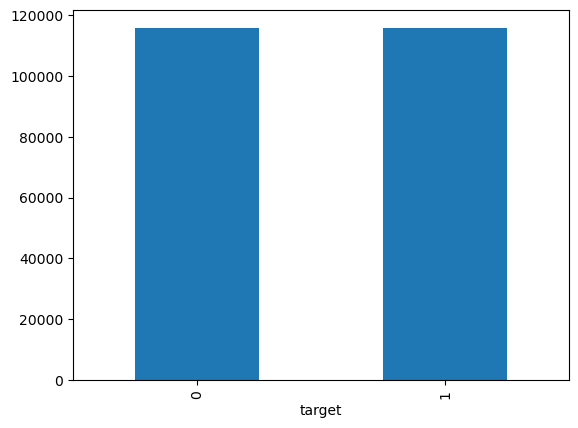

In [18]:
#Checking whether the given dataset is balanced or imbalanced
dftrain.target.value_counts().plot.bar()
#From the above bar graph we can conclude that the dataset is well balanced

In [19]:
X_train=dftrain.drop("target",axis=1)
Y_train=dftrain["target"]

In [20]:
X_train.head()

,tcp.flags,tcp.time_delta,tcp.len,mqtt.conack.flags,mqtt.conack.flags.reserved,mqtt.conack.flags.sp,mqtt.conack.val,mqtt.conflag.cleansess,mqtt.conflag.passwd,mqtt.conflag.qos,...,mqtt.protoname,mqtt.qos,mqtt.retain,mqtt.sub.qos,mqtt.suback.qos,mqtt.ver,mqtt.willmsg,mqtt.willmsg_len,mqtt.willtopic,mqtt.willtopic_len
0,0x00000018,0.998867,10,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0x00000010,0.000067,1460,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0x00000010,0.000058,1460,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0x00000018,0.000227,10,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0x00000018,0.000236,16,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
Y_train

0         0
1         1
2         1
3         0
4         1
         ..
231641    0
231642    0
231643    0
231644    1
231645    0
Name: target, Length: 231646, dtype: int32

In [22]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99290 entries, 0 to 99289
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tcp.flags                   99290 non-null  object 
 1   tcp.time_delta              99290 non-null  float64
 2   tcp.len                     99290 non-null  int64  
 3   mqtt.conack.flags           99290 non-null  object 
 4   mqtt.conack.flags.reserved  99290 non-null  float64
 5   mqtt.conack.flags.sp        99290 non-null  float64
 6   mqtt.conack.val             99290 non-null  float64
 7   mqtt.conflag.cleansess      99290 non-null  float64
 8   mqtt.conflag.passwd         99290 non-null  float64
 9   mqtt.conflag.qos            99290 non-null  float64
 10  mqtt.conflag.reserved       99290 non-null  float64
 11  mqtt.conflag.retain         99290 non-null  float64
 12  mqtt.conflag.uname          99290 non-null  float64
 13  mqtt.conflag.willflag       992

In [23]:
dftest.describe()

,tcp.time_delta,tcp.len,mqtt.conack.flags.reserved,mqtt.conack.flags.sp,mqtt.conack.val,mqtt.conflag.cleansess,mqtt.conflag.passwd,mqtt.conflag.qos,mqtt.conflag.reserved,mqtt.conflag.retain,...,mqtt.proto_len,mqtt.qos,mqtt.retain,mqtt.sub.qos,mqtt.suback.qos,mqtt.ver,mqtt.willmsg,mqtt.willmsg_len,mqtt.willtopic,mqtt.willtopic_len
count,99290.000000,99290.000000,99290.0,99290.0,99290.000000,99290.000000,99290.000000,99290.0,99290.0,99290.0,...,99290.000000,99290.000000,99290.000000,99290.0,99290.0,99290.000000,99290.0,99290.0,99290.0,99290.0
mean,0.254628,158.642008,0.0,0.0,0.020999,0.010726,0.004220,0.0,0.0,0.0,...,0.042905,0.167942,0.000342,0.0,0.0,0.042905,0.0,0.0,0.0,0.0
std,2.678437,940.715988,0.0,0.0,0.323351,0.103011,0.064824,0.0,0.0,0.0,...,0.412043,0.373817,0.018502,0.0,0.0,0.412043,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
25%,0.000002,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
50%,0.000012,10.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
75%,0.000139,14.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
max,60.000573,32768.000000,0.0,0.0,5.000000,1.000000,1.000000,0.0,0.0,0.0,...,4.000000,1.000000,1.000000,0.0,0.0,4.000000,0.0,0.0,0.0,0.0


In [24]:
dftest.isnull().sum()

tcp.flags                     0
tcp.time_delta                0
tcp.len                       0
mqtt.conack.flags             0
mqtt.conack.flags.reserved    0
mqtt.conack.flags.sp          0
mqtt.conack.val               0
mqtt.conflag.cleansess        0
mqtt.conflag.passwd           0
mqtt.conflag.qos              0
mqtt.conflag.reserved         0
mqtt.conflag.retain           0
mqtt.conflag.uname            0
mqtt.conflag.willflag         0
mqtt.conflags                 0
mqtt.dupflag                  0
mqtt.hdrflags                 0
mqtt.kalive                   0
mqtt.len                      0
mqtt.msg                      0
mqtt.msgid                    0
mqtt.msgtype                  0
mqtt.proto_len                0
mqtt.protoname                0
mqtt.qos                      0
mqtt.retain                   0
mqtt.sub.qos                  0
mqtt.suback.qos               0
mqtt.ver                      0
mqtt.willmsg                  0
mqtt.willmsg_len              0
mqtt.wil

In [25]:
dftest["target"]=dftest.target.apply(lambda x:0 if x=="legitimate" else 1).astype(int)

In [26]:
dftest.head()

,tcp.flags,tcp.time_delta,tcp.len,mqtt.conack.flags,mqtt.conack.flags.reserved,mqtt.conack.flags.sp,mqtt.conack.val,mqtt.conflag.cleansess,mqtt.conflag.passwd,mqtt.conflag.qos,...,mqtt.qos,mqtt.retain,mqtt.sub.qos,mqtt.suback.qos,mqtt.ver,mqtt.willmsg,mqtt.willmsg_len,mqtt.willtopic,mqtt.willtopic_len,target
0,0x00000014,0.029854,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0x00000018,0.000001,51,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0x00000018,0.999820,13,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0x00000012,0.007949,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0x00000010,0.000121,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


<Axes: xlabel='target'>

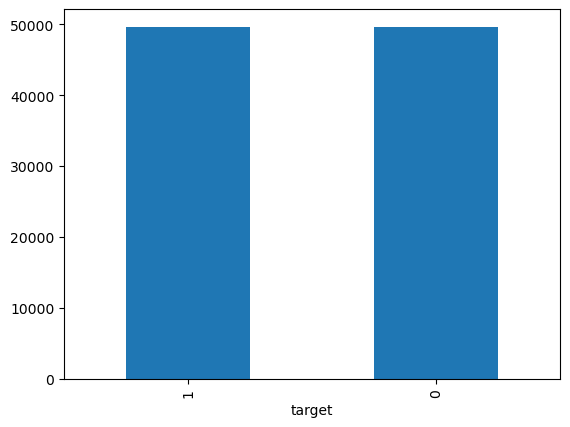

In [27]:
dftest.target.value_counts().plot.bar()

In [28]:
X_test=dftest.drop("target",axis=1)
Y_test=dftest["target"]

In [29]:
X_test.head()

,tcp.flags,tcp.time_delta,tcp.len,mqtt.conack.flags,mqtt.conack.flags.reserved,mqtt.conack.flags.sp,mqtt.conack.val,mqtt.conflag.cleansess,mqtt.conflag.passwd,mqtt.conflag.qos,...,mqtt.protoname,mqtt.qos,mqtt.retain,mqtt.sub.qos,mqtt.suback.qos,mqtt.ver,mqtt.willmsg,mqtt.willmsg_len,mqtt.willtopic,mqtt.willtopic_len
0,0x00000014,0.029854,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0x00000018,0.000001,51,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0x00000018,0.999820,13,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0x00000012,0.007949,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0x00000010,0.000121,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
Y_test.head()

0    1
1    1
2    0
3    1
4    1
Name: target, dtype: int32

In [31]:
le=LabelEncoder()
X_train["tcp.flags"]=le.fit_transform(X_train["tcp.flags"])
X_test["tcp.flags"]=le.transform(X_test["tcp.flags"])

In [32]:
X_train["mqtt.conack.flags"]=le.fit_transform(X_train["mqtt.conack.flags"])
X_test["mqtt.conack.flags"]=le.transform(X_test["mqtt.conack.flags"])

In [33]:
X_train["mqtt.conflags"]=le.fit_transform(X_train["mqtt.conflags"])
X_test["mqtt.conflags"]=le.transform(X_test["mqtt.conflags"])

In [34]:
X_train["mqtt.hdrflags"]=le.fit_transform(X_train["mqtt.hdrflags"])
X_test["mqtt.hdrflags"]=le.transform(X_test["mqtt.hdrflags"])

In [35]:
X_train["mqtt.protoname"]=le.fit_transform(X_train["mqtt.protoname"])
X_test["mqtt.protoname"]=le.transform(X_test["mqtt.protoname"])

In [36]:
X_train.drop("mqtt.msg",axis=1,inplace=True)
X_test.drop("mqtt.msg",axis=1,inplace=True)

In [37]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231646 entries, 0 to 231645
Data columns (total 32 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   tcp.flags                   231646 non-null  int32  
 1   tcp.time_delta              231646 non-null  float64
 2   tcp.len                     231646 non-null  int64  
 3   mqtt.conack.flags           231646 non-null  int32  
 4   mqtt.conack.flags.reserved  231646 non-null  float64
 5   mqtt.conack.flags.sp        231646 non-null  float64
 6   mqtt.conack.val             231646 non-null  float64
 7   mqtt.conflag.cleansess      231646 non-null  float64
 8   mqtt.conflag.passwd         231646 non-null  float64
 9   mqtt.conflag.qos            231646 non-null  float64
 10  mqtt.conflag.reserved       231646 non-null  float64
 11  mqtt.conflag.retain         231646 non-null  float64
 12  mqtt.conflag.uname          231646 non-null  float64
 13  mqtt.conflag.w

In [38]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99290 entries, 0 to 99289
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tcp.flags                   99290 non-null  int32  
 1   tcp.time_delta              99290 non-null  float64
 2   tcp.len                     99290 non-null  int64  
 3   mqtt.conack.flags           99290 non-null  int32  
 4   mqtt.conack.flags.reserved  99290 non-null  float64
 5   mqtt.conack.flags.sp        99290 non-null  float64
 6   mqtt.conack.val             99290 non-null  float64
 7   mqtt.conflag.cleansess      99290 non-null  float64
 8   mqtt.conflag.passwd         99290 non-null  float64
 9   mqtt.conflag.qos            99290 non-null  float64
 10  mqtt.conflag.reserved       99290 non-null  float64
 11  mqtt.conflag.retain         99290 non-null  float64
 12  mqtt.conflag.uname          99290 non-null  float64
 13  mqtt.conflag.willflag       992

In [39]:
x_train=X_train.values
print(x_train)

[[6.00000e+00 9.98867e-01 1.00000e+01 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [2.00000e+00 6.70000e-05 1.46000e+03 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [2.00000e+00 5.80000e-05 1.46000e+03 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 ...
 [2.00000e+00 1.00000e-05 0.00000e+00 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [6.00000e+00 1.00000e-06 1.20000e+01 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [2.00000e+00 6.00000e-06 0.00000e+00 ... 0.00000e+00 0.00000e+00
  0.00000e+00]]


In [40]:
y_train=Y_train.values

In [41]:
x_test=X_test.values
print(x_test)

[[5.0000e+00 2.9854e-02 0.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [6.0000e+00 1.0000e-06 5.1000e+01 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [6.0000e+00 9.9982e-01 1.3000e+01 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 ...
 [2.0000e+00 1.0630e-03 0.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [2.0000e+00 2.6000e-05 0.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [2.0000e+00 0.0000e+00 0.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]]


In [42]:
y_test=Y_test.values
y_test

array([1, 1, 0, ..., 1, 1, 1])

<Axes: >

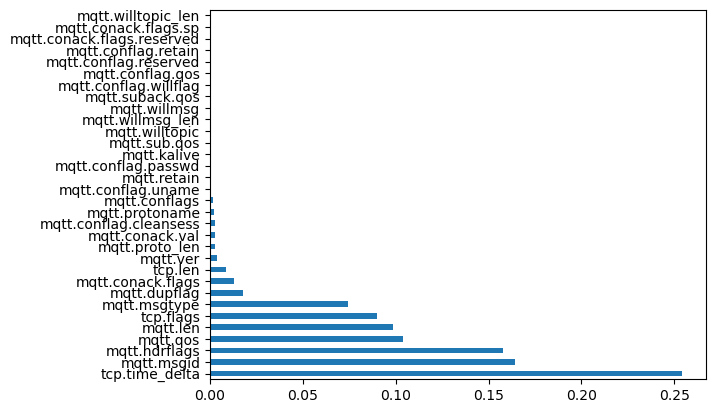

In [43]:
feat=ExtraTreesClassifier()
feat.fit(X_train,Y_train)
feat_imp=pd.Series(feat.feature_importances_,index=X_train.columns)
feat_imp.nlargest(33).plot(kind="barh")

<Axes: >

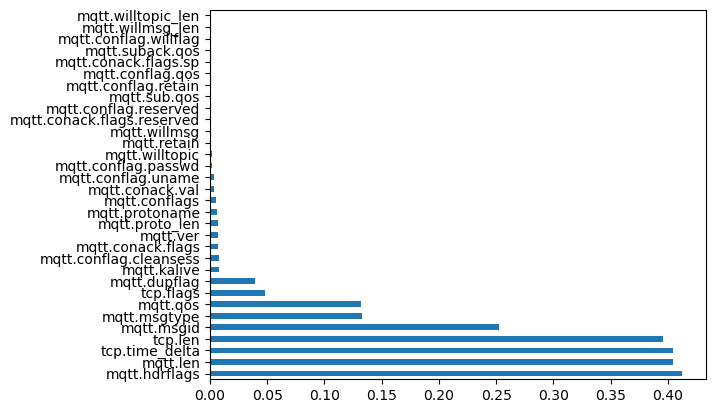

In [44]:
from sklearn.feature_selection import mutual_info_classif
%matplotlib inline

importances=mutual_info_classif(X_train,Y_train)
feat_importances=pd.Series(importances,index=X_train.columns)
feat_importances.nlargest(33).plot(kind="barh")


<Axes: >

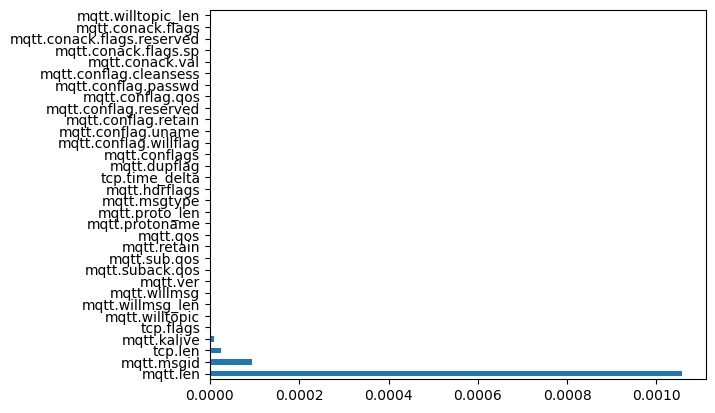

In [45]:
#embedded method
from sklearn.linear_model import LassoCV
model=LassoCV()
model.fit(X_train,Y_train)
feat_imp=pd.Series(model.coef_,index=X_train.columns)
feat_imp.nlargest(33).plot(kind="barh")

In [46]:
!pip install mlxtend

In [47]:
#forward feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
sfs1=sfs(clf,k_features=15,forward=True,floating=False,scoring='r2',verbose=2,cv=5)
sfs1.fit(X_train,Y_train)
feat_cols=list(sfs1.k_feature_idx_)
data_columns=list(X_train.columns)
for i in feat_cols:
    print(data_columns[i],end=" ")
#tcp.flags tcp.time_delta tcp.len mqtt.conack.flags mqtt.conack.flags.reserved mqtt.conack.flags.sp mqtt.conack.val mqtt.conflag.cleansess mqtt.conflag.passwd mqtt.conflag.qos mqtt.conflag.reserved mqtt.conflag.retain mqtt.conflag.willflag mqtt.hdrflags mqtt.len 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters vi

C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is depreca

C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is depreca

C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is depreca

C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:   55.6s finished

[2024-03-04 23:15:33] Features: 5/15 -- score: 0.8429500106654182[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecate

C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is depreca

C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is depreca

C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is depreca

C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is depreca

C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is depreca

C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is depreca

tcp.flags tcp.time_delta tcp.len mqtt.conack.flags mqtt.conack.flags.reserved mqtt.conack.flags.sp mqtt.conack.val mqtt.conflag.cleansess mqtt.conflag.passwd mqtt.conflag.qos mqtt.conflag.reserved mqtt.conflag.retain mqtt.conflag.willflag mqtt.hdrflags mqtt.len 

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   45.6s finished

[2024-03-04 23:23:49] Features: 15/15 -- score: 0.8429500106654182

In [48]:
#Recursive Feature Selection
from sklearn.feature_selection import RFE
clf = DecisionTreeClassifier()
rfe=RFE(clf)
X_rfe=rfe.fit_transform(X_train,Y_train)
model.fit(X_rfe,Y_train)
support=list(rfe.support_)
count=0
for i in range(0,len(support)):
    if(support[i]==True):
        print(data_columns[i],end=" ")
        count=count+1
print(count)    
#tcp.flags tcp.time_delta tcp.len mqtt.conack.flags mqtt.conack.flags.reserved mqtt.conack.flags.sp mqtt.conack.val mqtt.conflag.cleansess mqtt.len mqtt.msgid mqtt.msgtype mqtt.proto_len mqtt.protoname mqtt.qos mqtt.retain mqtt.sub.qos

tcp.flags tcp.time_delta tcp.len mqtt.conack.flags mqtt.conack.flags.reserved mqtt.conack.flags.sp mqtt.conack.val mqtt.conflag.cleansess mqtt.hdrflags mqtt.kalive mqtt.len mqtt.msgid mqtt.msgtype mqtt.proto_len mqtt.protoname mqtt.qos 16


<Axes: >

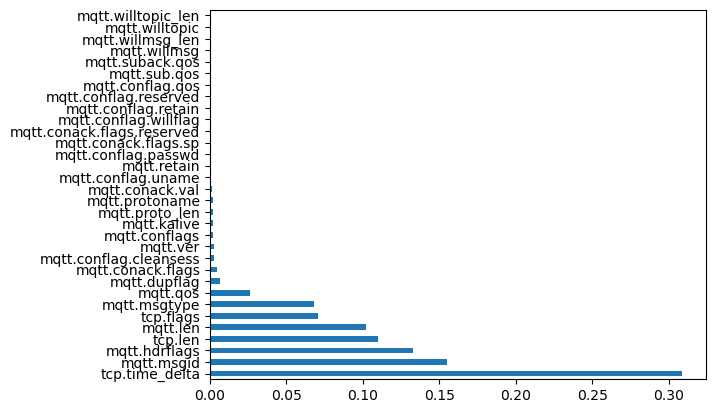

In [49]:
model=RandomForestClassifier(n_estimators=340)
model.fit(X_train,Y_train)
importances=model.feature_importances_
feat_imp=pd.Series(importances,index=X_train.columns)
feat_imp.nlargest(33).plot(kind="barh")

In [50]:
from sklearn.feature_selection import SelectFromModel
clf = DecisionTreeClassifier()
sfm=SelectFromModel(clf)
sfm.fit(X_train,Y_train)
selected_features = sfm.get_support()  
selected_columns = X_train.columns[selected_features]
print(selected_columns) 
#Index(['tcp.flags', 'tcp.time_delta', 'mqtt.hdrflags', 'mqtt.msgid'], dtype='object')

Index(['tcp.flags', 'tcp.time_delta', 'mqtt.hdrflags', 'mqtt.msgid'], dtype='object')


In [51]:
from sklearn.feature_selection import RFECV
estimator = DecisionTreeClassifier()
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(X_train,Y_train)
selected_features = selector.get_support()  
selected_columns = X_train.columns[selected_features]
print(selected_columns) 
#Index(['tcp.flags', 'tcp.time_delta', 'tcp.len', 'mqtt.len', 'mqtt.msgid','mqtt.msgtype'],dtype='object')

Index(['tcp.flags', 'tcp.time_delta', 'tcp.len', 'mqtt.len', 'mqtt.msgid',
       'mqtt.msgtype'],
      dtype='object')


C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 4  5  9 10 11 13 25 26 28 29 30 31] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


('tcp.flags', 4592.153862567334)
('tcp.time_delta', 1946.4707558475425)
('tcp.len', 5335.884447085292)
('mqtt.conack.flags', 2259.2448284497946)
('mqtt.conack.flags.reserved', nan)
('mqtt.conack.flags.sp', nan)
('mqtt.conack.val', 1019.9114456913638)
('mqtt.conflag.cleansess', 2260.2842390815435)
('mqtt.conflag.passwd', 1011.7704299056795)
('mqtt.conflag.qos', nan)
('mqtt.conflag.reserved', nan)
('mqtt.conflag.retain', nan)
('mqtt.conflag.uname', 1015.8407959875075)
('mqtt.conflag.willflag', nan)
('mqtt.conflags', 1769.2995268081966)
('mqtt.dupflag', 13564.070851612347)
('mqtt.hdrflags', 19946.898331752473)
('mqtt.kalive', 625.2909039908297)
('mqtt.len', 45814.39876409788)
('mqtt.msgid', 81850.72633506896)
('mqtt.msgtype', 5.636733243724047)
('mqtt.proto_len', 2260.2842390815435)
('mqtt.protoname', 2260.2842390815435)
('mqtt.qos', 56016.872744524124)
('mqtt.retain', 87.06615111460538)
('mqtt.sub.qos', nan)
('mqtt.suback.qos', nan)
('mqtt.ver', 2260.2842390815435)
('mqtt.willmsg', nan)


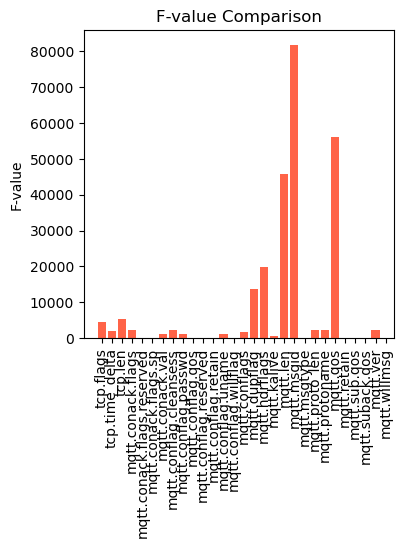

In [52]:
from sklearn.feature_selection import f_classif
f_value = f_classif(X_train,Y_train)
for feature in zip(data_columns, f_value[0]):
    print(feature)
pyplot.figure(figsize=(4,4))
pyplot.bar(x=data_columns, height=f_value[0], color='tomato')
pyplot.xticks(rotation='vertical')
pyplot.ylabel('F-value')
pyplot.title('F-value Comparison')
pyplot.show()



In [53]:
from sklearn.feature_selection import SelectKBest
skb = SelectKBest(score_func=f_classif, k=12)
X_data_new = skb.fit_transform(X_train, Y_train)
print('Number of features before feature selection: {}'.format(X_train.shape[1]))
print('Number of features after feature selection: {}'.format(X_data_new.shape[1]))
for feature_list_index in skb.get_support(indices=True):
    print('- ' + data_columns[feature_list_index])

Number of features before feature selection: 32
Number of features after feature selection: 12
- tcp.flags
- tcp.len
- mqtt.conack.flags
- mqtt.conflag.cleansess
- mqtt.dupflag
- mqtt.hdrflags
- mqtt.len
- mqtt.msgid
- mqtt.proto_len
- mqtt.protoname
- mqtt.qos
- mqtt.ver


C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 4  5  9 10 11 13 25 26 28 29 30 31] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [54]:
#backward feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
sfs1=sfs(clf,k_features=15,forward=False,floating=False,scoring='r2',verbose=2,cv=5)
sfs1.fit(X_train,Y_train)
feat_cols=list(sfs1.k_feature_idx_)
data_columns=list(X_train.columns)
for i in feat_cols:
    print(data_columns[i],end=" ")


C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s remaining:    0.0s
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters vi

C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is depreca

C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is depreca

C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is depreca

C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:  1.1min finished

[2024-03-04 23:35:25] Features: 27/15 -- score: 0.842

C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is depreca

C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is depreca

C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is depreca

C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is depreca

C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is depreca

C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is depreca

C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\sathv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is depreca

tcp.flags tcp.time_delta tcp.len mqtt.conack.flags mqtt.conack.flags.reserved mqtt.conack.flags.sp mqtt.conack.val mqtt.conflag.cleansess mqtt.conflag.passwd mqtt.conflag.qos mqtt.conflag.reserved mqtt.conflag.retain mqtt.conflag.uname mqtt.hdrflags mqtt.len 

[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:   21.9s finished

[2024-03-04 23:43:30] Features: 15/15 -- score: 0.8429500106654182

In [89]:
x_train=X_train[["tcp.time_delta","mqtt.msgid","mqtt.len","tcp.flags","tcp.len"]].values

In [90]:
x_test=X_test[["tcp.time_delta","mqtt.msgid","mqtt.len","tcp.flags","tcp.len"]].values

#Artificial Neural Network
model = Sequential()
model.add(Dense(50, input_dim=x_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(30, input_dim=x_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(20, kernel_initializer='normal'))
model.add(Dense(6,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=2,epochs=200,batch_size=1000) 
end = time.time()
diff=end-start
print("Training time: " + str(diff))
starttest = time.time()
y_pred_nn = model.predict(x_test)
y_pred_nn = np.argmax(y_pred_nn,axis=1)
endtest =time.time()
difftest = endtest-starttest
print("Test time: " + str(difftest))

print(model.summary())
print(model.evaluate(x_test,y_test)[1])
#The accuracy is 0.8455

In [91]:
print("Starting Random forest")
classifier = RandomForestClassifier(verbose=2,random_state=seed)
classifier.fit(x_train, y_train)
end = time.time()
diff=end-start
print("Training time: " + str(diff))
starttest = time.time()
y_pred_random = classifier.predict(x_test)
endtest =time.time()
difftest = endtest-starttest
print("Test time: " + str(difftest))
print("The accuracy is "+str(accuracy_score(y_test,y_pred_random)))
#Accuracy is 0.95383

Starting Random forest
building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   14.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Training time: 2820.4145720005035
Test time: 0.5802922248840332
The accuracy is 0.9526639137878941


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


In [92]:
print("Starting Naive Bayes")
gnb = GaussianNB()
gnb.fit(x_train, y_train)
end = time.time()
diff=end-start
print("Training time: " + str(diff))
starttest = time.time()
y_pred_nb = gnb.predict(x_test)
endtest =time.time()
difftest = endtest-starttest
print("Test time: " + str(difftest))
print("Accuracy is "+str(accuracy_score(y_test,y_pred_nb)))
#The accuracy is 0.79807

Starting Naive Bayes
Training time: 2821.0721328258514
Test time: 0.020958662033081055
Accuracy is 0.7836539429952664


In [93]:
#Decision tree
print("Starting Decision tree")
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
end = time.time()
diff=end-start
print("Training time: " + str(diff))
starttest = time.time()
y_pred_dt = clf.predict(x_test)
y_pred_dt_roc = clf.predict_proba(x_test)
endtest =time.time()
difftest = endtest-starttest
print("Test time: " + str(difftest))
print("The accuracy is "+str(accuracy_score(y_pred_dt,y_test)))
#Accuracy is 0.95387

Starting Decision tree
Training time: 2821.278299331665
Test time: 0.01683783531188965
The accuracy is 0.9526739852955988


In [94]:
print("Starting Multi layer perceptron")
model = MLPClassifier( max_iter=130, batch_size=1000, alpha=1e-4, activation = 'relu',solver='adam', verbose=10, tol=1e-4, random_state=seed)
model.fit(x_train, y_train)
end = time.time()
diff=end-start
print("Training time: " + str(diff))
starttest = time.time()
y_pred_mlp = model.predict(x_test)
endtest =time.time()
difftest = endtest-starttest
print("Test time: " + str(difftest))
print("Accuracy is "+str(accuracy_score(y_pred_mlp,y_test)))
#Accuracy is 0.8455

Starting Multi layer perceptron
Iteration 1, loss = 0.32796782
Iteration 2, loss = 0.29504887
Iteration 3, loss = 0.28352203
Iteration 4, loss = 0.27658117
Iteration 5, loss = 0.27132602
Iteration 6, loss = 0.26741680
Iteration 7, loss = 0.26444147
Iteration 8, loss = 0.26248940
Iteration 9, loss = 0.26073342
Iteration 10, loss = 0.25978255
Iteration 11, loss = 0.25865295
Iteration 12, loss = 0.25792559
Iteration 13, loss = 0.25718901
Iteration 14, loss = 0.25694786
Iteration 15, loss = 0.25609652
Iteration 16, loss = 0.25570856
Iteration 17, loss = 0.25532038
Iteration 18, loss = 0.25481134
Iteration 19, loss = 0.25429920
Iteration 20, loss = 0.25405609
Iteration 21, loss = 0.25377869
Iteration 22, loss = 0.25335875
Iteration 23, loss = 0.25347485
Iteration 24, loss = 0.25265146
Iteration 25, loss = 0.25237361
Iteration 26, loss = 0.25217786
Iteration 27, loss = 0.25199271
Iteration 28, loss = 0.25145454
Iteration 29, loss = 0.25111188
Iteration 30, loss = 0.25103058
Iteration 31, los

In [95]:
print("Starting Gradient boost")
model = GradientBoostingClassifier(n_estimators=20, random_state=seed,verbose=2)
model.fit(x_train, y_train)
end = time.time()
diff=end-start
print("Training time: " + str(diff))
starttest = time.time()
y_pred_gradient = model.predict(x_test)
endtest =time.time()
difftest = endtest-starttest
print("Test time: " + str(difftest))
print("Accuracy is"+str(accuracy_score(y_pred_gradient,y_test)))
#Accuracy is 0.93559

Starting Gradient boost
      Iter       Train Loss   Remaining Time 
         1           1.2578            2.05s
         2           1.1528            2.29s
         3           1.0701            2.58s
         4           1.0009            2.29s
         5           0.9423            2.02s
         6           0.8922            1.77s
         7           0.8492            1.66s
         8           0.8135            1.55s
         9           0.7642            1.43s
        10           0.7220            1.32s
        11           0.6964            1.18s
        12           0.6619            1.03s
        13           0.6416            0.89s
        14           0.6131            0.75s
        15           0.5966            0.63s
        16           0.5754            0.51s
        17           0.5572            0.39s
        18           0.5345            0.26s
        19           0.5143            0.13s
        20           0.4980            0.00s
Training time: 2859.1641941070

In [ ]:

model = KNeighborsClassifier(n_neighbors=30)
model.fit(x_train,y_train)
Y_knn_pred=model.predict(x_test)
print(accuracy_score(Y_knn_pred,y_test))


In [ ]:
print("Decision Tree, accuracy: " + str(metrics.accuracy_score(y_test, y_pred_dt)) + " F1 score:" + str(metrics.f1_score(y_test, y_pred_dt,average='weighted')))
matrixdt = confusion_matrix(y_test,y_pred_dt)
print(matrixdt)

In [ ]:
print("Naive Bayes, accuracy: " + str(metrics.accuracy_score(y_test, y_pred_nb)) + " F1 score:" + str(metrics.f1_score(y_test, y_pred_nb,average='weighted')))
matrixnv = confusion_matrix(y_test,y_pred_nb)
print(matrixnv)

print("Neural network, accuracy: " + str(metrics.accuracy_score(y_test, y_pred_nn)) + " F1 score:" + str(metrics.f1_score(y_test, y_pred_nn,average='weighted')))
matrixnn = confusion_matrix(y_test,y_pred_nn)
print(matrixnn)


In [ ]:
print("MultiLayerPerceptron, accuracy: " + str(metrics.accuracy_score(y_test, y_pred_mlp)) + " F1 score:" + str(metrics.f1_score(y_test, y_pred_mlp,average='weighted')))
matrixml = confusion_matrix(y_test,y_pred_mlp)
print(matrixml)

In [ ]:
print("Random Forest, accuracy: " + str(metrics.accuracy_score(y_test, y_pred_random)) + " F1 score:" + str(metrics.f1_score(y_test, y_pred_random,average='weighted')))
matrixrf = confusion_matrix(y_test,y_pred_random)
print(matrixrf)

In [ ]:
print("GradienBoost, accuracy: " + str(metrics.accuracy_score(y_test, y_pred_gradient)) + " F1 score:" + str(metrics.f1_score(y_test, y_pred_gradient,average='weighted')))
matrixgb = confusion_matrix(y_test,y_pred_gradient)
print(matrixgb)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[int(x) for x in np.linspace(100,1200,12)]
max_features=["auto","sqrt","log2"]
max_depth=[int(x) for x in np.linspace(5,30,6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]
random_grid={'max_features':max_features,'max_depth':max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf}
rf_regressor=RandomizedSearchCV(estimator=clf,param_distributions=random_grid,scoring='neg_mean_squared_error',cv=5, verbose = 2,random_state=42,n_jobs=1)
rf_regressor.fit(x_train,y_train)

In [ ]:
rf_regressor.best_params_

In [ ]:
Y_pred=rf_regressor.predict(x_test)

In [ ]:
r2_score(y_test,Y_pred)